## Import Packages

In [4]:
import os
import matplotlib.pyplot as plt
import cv2
import random

## Define the paths

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Define the paths
training_path = '/content/drive/MyDrive/Brain Tumor MRI Dataset/Training'
testing_path = '/content/drive/MyDrive/Brain Tumor MRI Dataset/Testing'

# Classes
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']


In [7]:
# Function to count images in each class
def count_images_in_classes(base_path, classes):
    counts = {}
    for cls in classes:
        class_path = os.path.join(base_path, cls)
        counts[cls] = len(os.listdir(class_path))
    return counts

# Count images in training and testing sets
training_counts = count_images_in_classes(training_path, classes)
testing_counts = count_images_in_classes(testing_path, classes)


In [8]:
# Plotting the distribution
def plot_distribution(counts, title):
    plt.figure(figsize=(10, 5))
    plt.bar(counts.keys(), counts.values(), color=['blue', 'orange', 'green', 'red'])
    plt.xlabel('Class')
    plt.ylabel('Number of images')
    plt.title(title)
    plt.show()



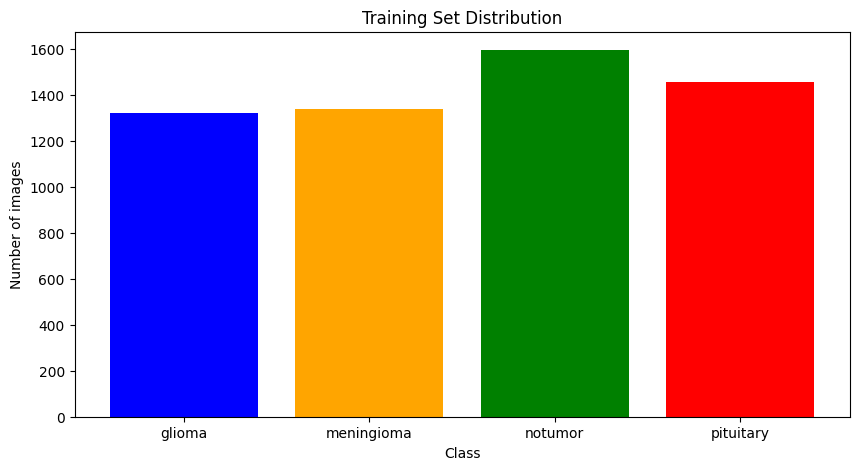

In [9]:
# Plot distributions
plot_distribution(training_counts, 'Training Set Distribution')



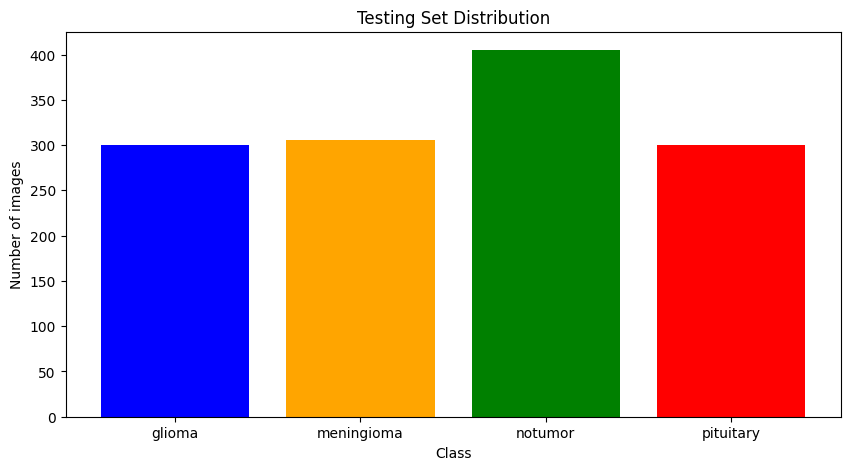

In [10]:
plot_distribution(testing_counts, 'Testing Set Distribution')

## Display sample images

In [11]:
# Function to display sample images from each class
def display_sample_images(base_path, classes, num_samples=3):
    plt.figure(figsize=(15, 10))
    for i, cls in enumerate(classes):
        class_path = os.path.join(base_path, cls)
        images = os.listdir(class_path)
        for j in range(num_samples):
            img_path = os.path.join(class_path, random.choice(images))
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(len(classes), num_samples, i * num_samples + j + 1)
            plt.imshow(img)
            plt.title(cls)
            plt.axis('off')
    plt.tight_layout()
    plt.show()


## Training set Sample images

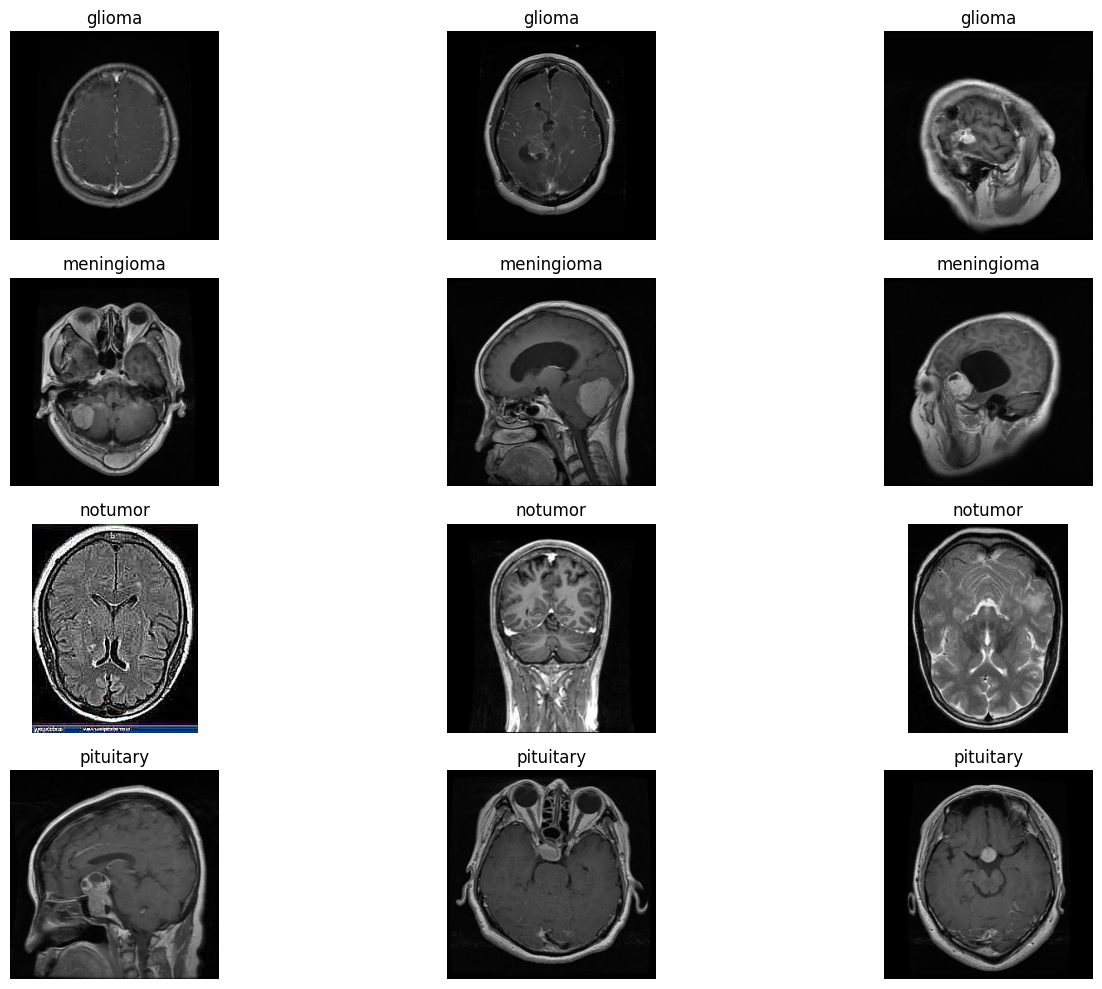

In [12]:
# Display sample images from training set
display_sample_images(training_path, classes)



## Testing set Sample images

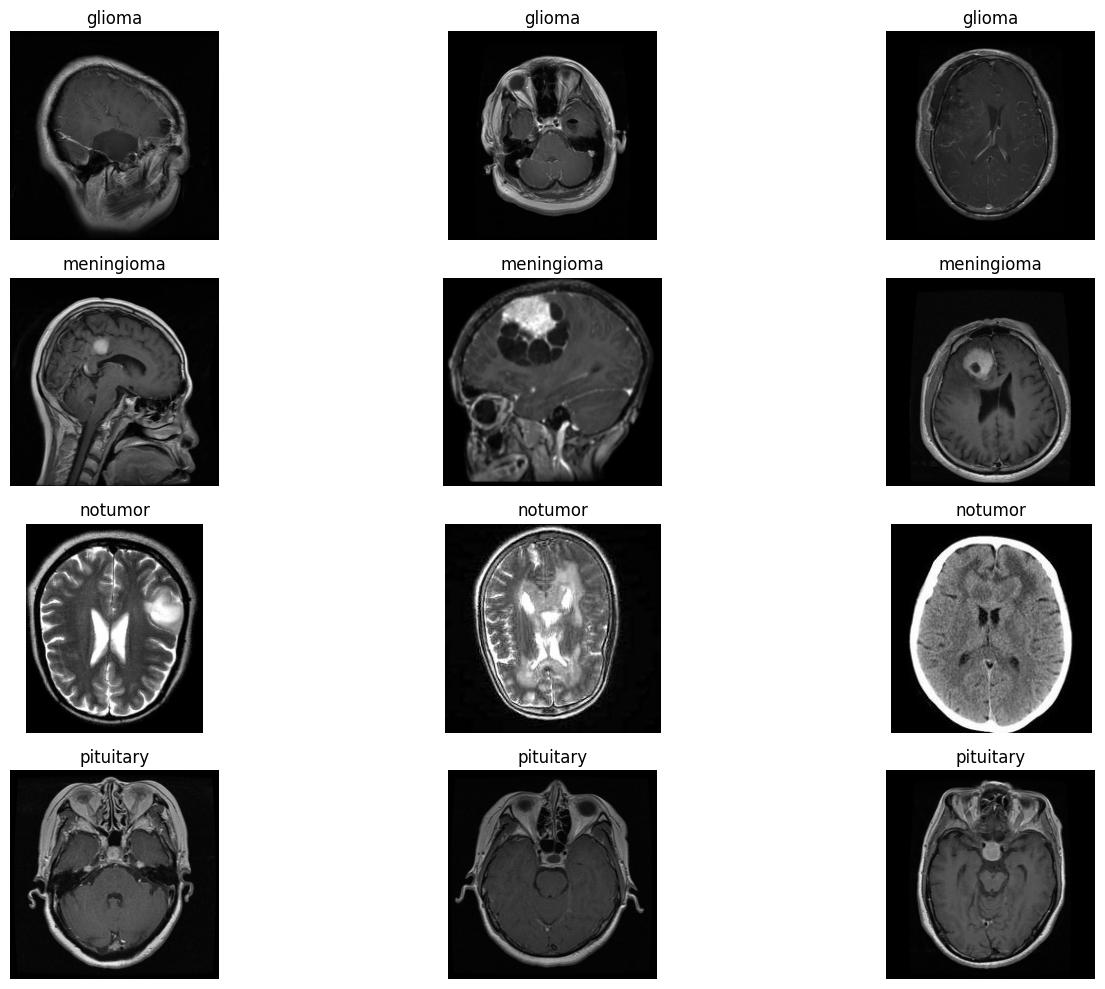

In [13]:
# Display sample images from testing set
display_sample_images(testing_path, classes)


## Image properties

In [14]:
# Function to check image properties
def check_image_properties(base_path, classes):
    properties = []
    for cls in classes:
        class_path = os.path.join(base_path, cls)
        img_path = os.path.join(class_path, os.listdir(class_path)[0])
        img = cv2.imread(img_path)
        properties.append((cls, img.shape))
    return properties

# Check image properties
training_properties = check_image_properties(training_path, classes)
testing_properties = check_image_properties(testing_path, classes)



In [15]:
print("Training set image properties:")
for cls, prop in training_properties:
    print(f"Class: {cls}, Image Shape: {prop}")



Training set image properties:
Class: glioma, Image Shape: (512, 512, 3)
Class: meningioma, Image Shape: (512, 512, 3)
Class: notumor, Image Shape: (222, 227, 3)
Class: pituitary, Image Shape: (512, 512, 3)


In [16]:
print("\nTesting set image properties:")
for cls, prop in testing_properties:
    print(f"Class: {cls}, Image Shape: {prop}")


Testing set image properties:
Class: glioma, Image Shape: (512, 512, 3)
Class: meningioma, Image Shape: (442, 442, 3)
Class: notumor, Image Shape: (262, 236, 3)
Class: pituitary, Image Shape: (512, 512, 3)
